In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Degree in Data Science and Engineering, group 96
## Machine Learning 2
### Fall 2024

&nbsp;
&nbsp;
&nbsp;
# Lab 2. Classification with corrupted data

&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# Introduction

In this lab you are working with a dataset corresponding to a task of wine classification. The observations comprise 13 features and there are 3 different output classes.

Your goal is to construct a classification model with a Support Vector Machine and for this purpose you have access to two different datasets stored in these two files:
- `initial_data.csv``
- `new_data.csv`

There is a third data set in file `test_set.csv` that will act as test set. That is you can't use the data in  `test_set.csv` to train any model, these data have to be used just for evaluating already fit models. Otherwise you would overfit and your results would be useless.

Some of the observations in `new_data.csv` have been corrupted, therefore you will explore different alternatives to clean this dataset using One Class Support Vector Machines.

# Load initial dataset

The following cell loads the data in file `initial_data.csv` (it's a csv file, you can open it with a text editor and read its contents).

In [3]:
D = pd.read_csv('initial_data.csv', header=0, index_col=0)
feature_names = D.columns[:-1]
Xtrain = D[D.columns[:-1]].values
Ytrain = D['target'].values
print('Loaded {0:d} observations with {1:d} features'.format(Xtrain.shape[0], Xtrain.shape[1]))
print('There are {0:d} different output classes'.format(len(np.unique(Ytrain))))


Loaded 25 observations with 13 features
There are 3 different output classes


# Load test dataset

Write code that loads the data contained in `test_set.csv` and store the observations in a np array called `Xtest` and the targets in a np array called `Ytest`.

In [4]:
D = pd.read_csv('test_set.csv', header=0, index_col=0)
feature_names = D.columns[:-1]
Xtest = D[D.columns[:-1]].values
Ytest = D['target'].values
print('Loaded {0:d} observations with {1:d} features'.format(Xtest.shape[0], Xtest.shape[1]))
print('There are {0:d} different output classes'.format(len(np.unique(Ytest))))

KeyError: 'target'

# Load new dataset

Write code that loads the data contained in `new_data.csv` (the data you need to clean) and store the observations in a np array called `Xnew` and the targets in a np array called `Ynew`.

In [ ]:
D = pd.read_csv('new_data.csv', header=0, index_col=0)
feature_names = D.columns[:-1]
Xnew = D[D.columns[:-1]].values
Ynew = D['target'].values
print('Loaded {0:d} observations with {1:d} features'.format(Xnew.shape[0], Xnew.shape[1]))
print('There are {0:d} different output classes'.format(len(np.unique(Ynew))))

Loaded 64 observations with 13 features
There are 3 different output classes


# 1. First classification with SVM

The first exercise is to find out which kernel should we use for the SVM. We are trying two kernels: linear and RBF. The linear SVM performance depends on hyper-parameter $C$. The introduction of the RBF kernel to get a non-linear classification boundary brings in the need to find a reasonable value for the kernel spread $\gamma$.

Review how to find good values for these hyper-parameters with scikit learn functionality [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Specifically make sure you understand:
- `GridSearchCV.best_params_`
- `GridSearchCV.best_score_`
- `GridSearchCV.best_estimator_`


In the next cell write code to explore the value of $C$ for the SVM with the linear kernel within the range
$$
C \in \{ 0.1, 1, 10, 100, 1000, 10000 \}
$$

Use 5 folds in the cross-validation and also set `n_jobs=-1` so that you could use all the available cores in your computer.

Make sure you print the validation score, as you will use it to decide for the most suitable kernel, and the best value found for $C$ to make sure it is not one of the extremes of the range. That being the case, extend the range in the appropriate direction.



In [ ]:


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000]}

# Create an SVC object with a linear kernel
svc = SVC(kernel='linear')

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain, Ytrain)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print("Best estimator:", grid_search.best_estimator_)

Best parameters: {'C': 0.1}
Best score: 0.8800000000000001
Best estimator: SVC(C=0.1, kernel='linear')


In [ ]:
# best C is 0.1, so we extend the range towards the left extreme

# Still C=0.1, so we stop here the search

Now we look at the nonlinear boudnary. Use `GridSearchCV` to find values for `gamma` and `C`  in ranges
    - $C$ same range as linear kernel
    - $\gamma \in \{ 0.001, 0.01, 0.1, 1, 2 \}$


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C and gamma
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 2]}

# Create an SVC object with an RBF kernel
svc = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain, Ytrain)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 0.001}
Best score: 0.76


## 1.1 Consider scaling the data

Use method `pandas.describe` to explore the ranges of the different features that form the observations. Perhaps scaling the data helps the RBF kernel capture better the information in the features.

You will use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to scale the data before feeding it into the classifier in a transparent manner.

Write code that repeats the kernel selection but now scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for C and gamma
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000, 10000],
              'svc__gamma': [0.001, 0.01, 0.1, 1, 2]}

# Create a pipeline with StandardScaler and SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])

# Create a GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(Xtrain, Ytrain)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

D.describe()

Best parameters: {'svc__C': 10, 'svc__gamma': 0.001}
Best score: 1.0


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.918800,1.991600,2.282800,18.748000,99.320000,2.188800,2.002400,0.37720,1.526000,5.177200,0.959840,2.547600,758.040000,1.920000
std,0.848937,0.970759,0.233194,2.317527,11.119502,0.615673,0.953713,0.12133,0.583909,2.489757,0.254003,0.837005,266.893156,0.759386
min,11.030000,0.890000,1.700000,14.600000,78.000000,1.100000,0.580000,0.22000,0.410000,1.280000,0.570000,1.330000,407.000000,1.000000
25%,12.290000,1.360000,2.120000,17.000000,94.000000,1.620000,1.090000,0.29000,1.140000,3.170000,0.790000,1.670000,550.000000,1.000000
50%,13.050000,1.730000,2.280000,19.000000,100.000000,2.350000,2.170000,0.34000,1.630000,5.100000,0.980000,2.870000,680.000000,2.000000
75%,13.510000,2.310000,2.410000,20.000000,108.000000,2.700000,2.880000,0.43000,1.980000,6.600000,1.110000,3.180000,920.000000,2.000000
max,14.390000,4.280000,2.700000,24.000000,120.000000,3.000000,3.540000,0.63000,2.490000,10.200000,1.710000,4.000000,1290.000000,3.000000


We will, therefore, stick to the RBF kernel for the next of the notebook.

## 1.2 First classification of the test set with a SVM fitted just with the initial data

Write code that computes the accuracy of a SVM endowed with the RBF kernel and value of $C$ found in the previous sections in the test set.

Store this accuracy in a variable called `acc_1`.

In [ ]:


# Create a pipeline with StandardScaler and SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10, gamma=0.01))])

# Fit the pipeline to the training data
pipe.fit(Xtrain, Ytrain)

# Calculate the accuracy on the test set
acc_1 = pipe.score(Xtest, Ytest)

print(f"Accuracy on test set: {acc_1}")


Accuracy on test set: 0.8876404494382022


The following cell creates a dictionary list called `Results` where you will be adding a dictionary per evaluated method in order to facilitate the comparison of their performances. Each dictionary will have these three keys:
- 'Method': short text describing the method
- 'Test Acc':  accuracy in the test set
- 'training set size': number of observations used to fit the classifier


In [ ]:
Results = [{'Method':'SVM initial data',
           'Test Acc':acc_1,'training set size':len(Ytrain)}]
pd.DataFrame(Results)

,Method,Test Acc,training set size
0,SVM initial data,0.88764,25


# 2. Classify joining the new data with the initial dataset

Now you will start evaluating different ways to add the data in `new_data.csv` to improve the classification. As a first attempt, you will use all these data without cleaning.

Write code that fits the pipeline that includes the classifier with a dataset that includes both sets (initial and new).

Add to `Results` the corresponding dictionary.

In [ ]:
# Concatenate the initial and new datasets
X_combined = np.concatenate((Xtrain, Xnew))
Y_combined = np.concatenate((Ytrain, Ynew))

# Create a pipeline with StandardScaler and SVC
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10, gamma=0.01))])

# Fit the pipeline to the combined data
pipe.fit(X_combined, Y_combined)

# Calculate the accuracy on the test set
acc_2 = pipe.score(Xtest, Ytest)

# Add the results to the Results list
Results.append({'Method': 'SVM initial+new data', 'Test Acc': acc_2, 'training set size': len(Y_combined)})

print(f"Accuracy on test set: {acc_2}")
pd.DataFrame(Results)


Accuracy on test set: 0.8426966292134831


,Method,Test Acc,training set size
0,SVM initial data,0.887640,25
1,SVM initial+new data,0.842697,89


In [ ]:
Results = Results[:-1]
pd.DataFrame(Results)

,Method,Test Acc,training set size
0,SVM initial data,0.898876,25
1,SVM initial+new data,0.808989,89


# 3. Clean new data using a OCSVM trained with the initial dataset

The first strategy to clean the new daset in order to remove the outliers that cause that decreasing in the classifier accuracy will be to employ a One Class SVM fitted with the initial data, and remove those examples from the new dataset predicted as outliers by the OCSVM.

Since we trust the initial dataset, we will employ small values for the parameter `nu` of the SVM: $\nu \in \{0.001, 0.005, 0.01\}$.

Notice that the OCSVM is a non-supervised method. Therefore we will rely on the performance of the downstream classifier to find out which value of parameter $\nu$ suits better our model.

In the next cell write code that implements a loop for all the values in the range for parameter `nu` performs the following:
- Create a OCSVM with RBF kernel, argument `gamma` set to `'scale'` and argument `nu` set to the value corresponding to the loop iteration. Do not forget to scale the data (with a pipeline similar to that of the classifier)
- Fit this OCSVM with the initial dataset
- Print the percentage of the observations in the initial dataset predicted as inliers by the OCSVM
- Find the observations in the new data set that are predicted as inliers by the OCSVM
- Train a SVM with these inliers and the set of best hyper-parameters found for the initial dataset.
- Evaluate the performance of this new SVM on the initil dataset

The best value of `nu`, and therefore the subset of inliers from the new dataset that will be used to improve the model will be the ones that correspond to the iteration in with the classification accuracy is maximized.

In [ ]:
 
from sklearn.svm import OneClassSVM

# Define the range of nu values
nu_values = [0.001, 0.005, 0.01]

# Loop through nu values
for nu in nu_values:
    # Create a pipeline with StandardScaler and OneClassSVM
    pipe_ocsvm = Pipeline([('scaler', StandardScaler()), ('ocsvm', OneClassSVM(kernel='rbf', gamma='scale', nu=nu))])

    # Fit the pipeline to the initial training data
    pipe_ocsvm.fit(Xtrain)

    # Calculate the percentage of inliers in the initial dataset
    inliers_initial = pipe_ocsvm.predict(Xtrain)
    percentage_inliers = (inliers_initial == 1).sum() / len(inliers_initial)
    print(f"Percentage of inliers in initial dataset (nu={nu}): {percentage_inliers:.4f}")

    # Predict inliers in the new dataset
    inliers_new = pipe_ocsvm.predict(Xnew)

    # Extract inliers from the new dataset
    Xnew_inliers = Xnew[inliers_new == 1]
    Ynew_inliers = Ynew[inliers_new == 1]

    # Combine inliers from new dataset with initial dataset
    X_combined = np.concatenate((Xtrain, Xnew_inliers))
    Y_combined = np.concatenate((Ytrain, Ynew_inliers))

    # Create a pipeline with StandardScaler and SVC
    pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=1000, gamma=0.01))])

    # Fit the pipeline to the combined data
    pipe_svc.fit(X_combined, Y_combined)

    # Calculate the accuracy on the test set
    acc = pipe_svc.score(Xtest, Ytest)

    print(f"Accuracy on test set (nu={nu}): {acc:.4f}")
    percentage_inliers_new = (inliers_new == 1).sum() / len(inliers_new)

    print(f"number of inliers in the new dataset:{percentage_inliers_new :4f}")

# Find the best nu based on accuracy and train the final classifier (This part requires manual inspection of the output)
# ...

Percentage of inliers in initial dataset (nu=0.001): 0.5600
Accuracy on test set (nu=0.001): 0.8876
number of inliers in the new dataset:0.093750
Percentage of inliers in initial dataset (nu=0.005): 0.6800
Accuracy on test set (nu=0.005): 0.8989
number of inliers in the new dataset:0.093750
Percentage of inliers in initial dataset (nu=0.01): 0.5600
Accuracy on test set (nu=0.01): 0.8989
number of inliers in the new dataset:0.078125


Now construct a new dataset merging the initial data set with the inliers from the new dataset found in the previous step and.

Train a SVM with this dataset. Scale the data and use `GridSearchCV` to find reasonable values for hyperparameters `C` and `gamma`.

Add the corresponding dictionary with the performance of this classifier to `Results`.

In [ ]:
 
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the range of nu values
nu_values = [0.001, 0.005, 0.01]

# Initialize variables to store results
best_nu = None
best_acc = 0
best_pipe_svc = None

# Loop through nu values
for nu in nu_values:
    # Create a pipeline with StandardScaler and OneClassSVM
    pipe_ocsvm = Pipeline([('scaler', StandardScaler()), ('ocsvm', OneClassSVM(kernel='rbf', gamma='scale', nu=nu))])

    # Fit the pipeline to the initial training data
    pipe_ocsvm.fit(Xtrain)

    # Calculate the percentage of inliers in the initial dataset
    inliers_initial = pipe_ocsvm.predict(Xtrain)
    percentage_inliers = (inliers_initial == 1).sum() / len(inliers_initial)
    print(f"Percentage of inliers in initial dataset (nu={nu}): {percentage_inliers:.4f}")

    # Predict inliers in the new dataset
    inliers_new = pipe_ocsvm.predict(Xnew)

    # Extract inliers from the new dataset
    Xnew_inliers = Xnew[inliers_new == 1]
    Ynew_inliers = Ynew[inliers_new == 1]


    # Create a pipeline with StandardScaler and SVC
    pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': [1, 0.1, 0.01, 0.001]
    }

    # Create a GridSearchCV object
    # Use StratifiedKFold to ensure class proportions are maintained in each fold
    from sklearn.model_selection import StratifiedKFold
    grid_svc = GridSearchCV(pipe_svc, param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1)

    # Fit the GridSearchCV object to the combined data
    grid_svc.fit(Xnew_inliers, Ynew_inliers)

    # Get the best estimator and its accuracy
    best_pipe_svc_temp = grid_svc.best_estimator_
    acc = best_pipe_svc_temp.score(Xtest, Ytest)

    print(f"Accuracy on test set (nu={nu}): {acc:.4f}")
    percentage_inliers_new = (inliers_new == 1).sum() / len(inliers_new)

    print(f"number of inliers in the new dataset:{percentage_inliers_new :4f}")

    # Check if current nu has better accuracy
    if acc > best_acc:
        best_acc = acc
        best_nu = nu
        best_pipe_svc = best_pipe_svc_temp

# Train the final classifier with the best nu
print(f"Best nu: {best_nu}, Best Accuracy: {best_acc:.4f}")

# You can now use best_pipe_svc for predictions
# For example:
# predictions = best_pipe_svc.predict(X_new_data)

Percentage of inliers in initial dataset (nu=0.001): 0.5600


ValueError: n_splits=5 cannot be greater than the number of members in each class.

# 4. Analize individual variables to see if all of them were corrupted

The next cell plots histograms of all the features that define the observations. Each subplot has a curve for the observations in the initial data set and another one for the observations in the new data set.

Decide if the process that corrupted some of the observations in the new data set affected with more intensity to a subset of the features.

If so, identify which features are more likely to be informative for the outlier detection task.

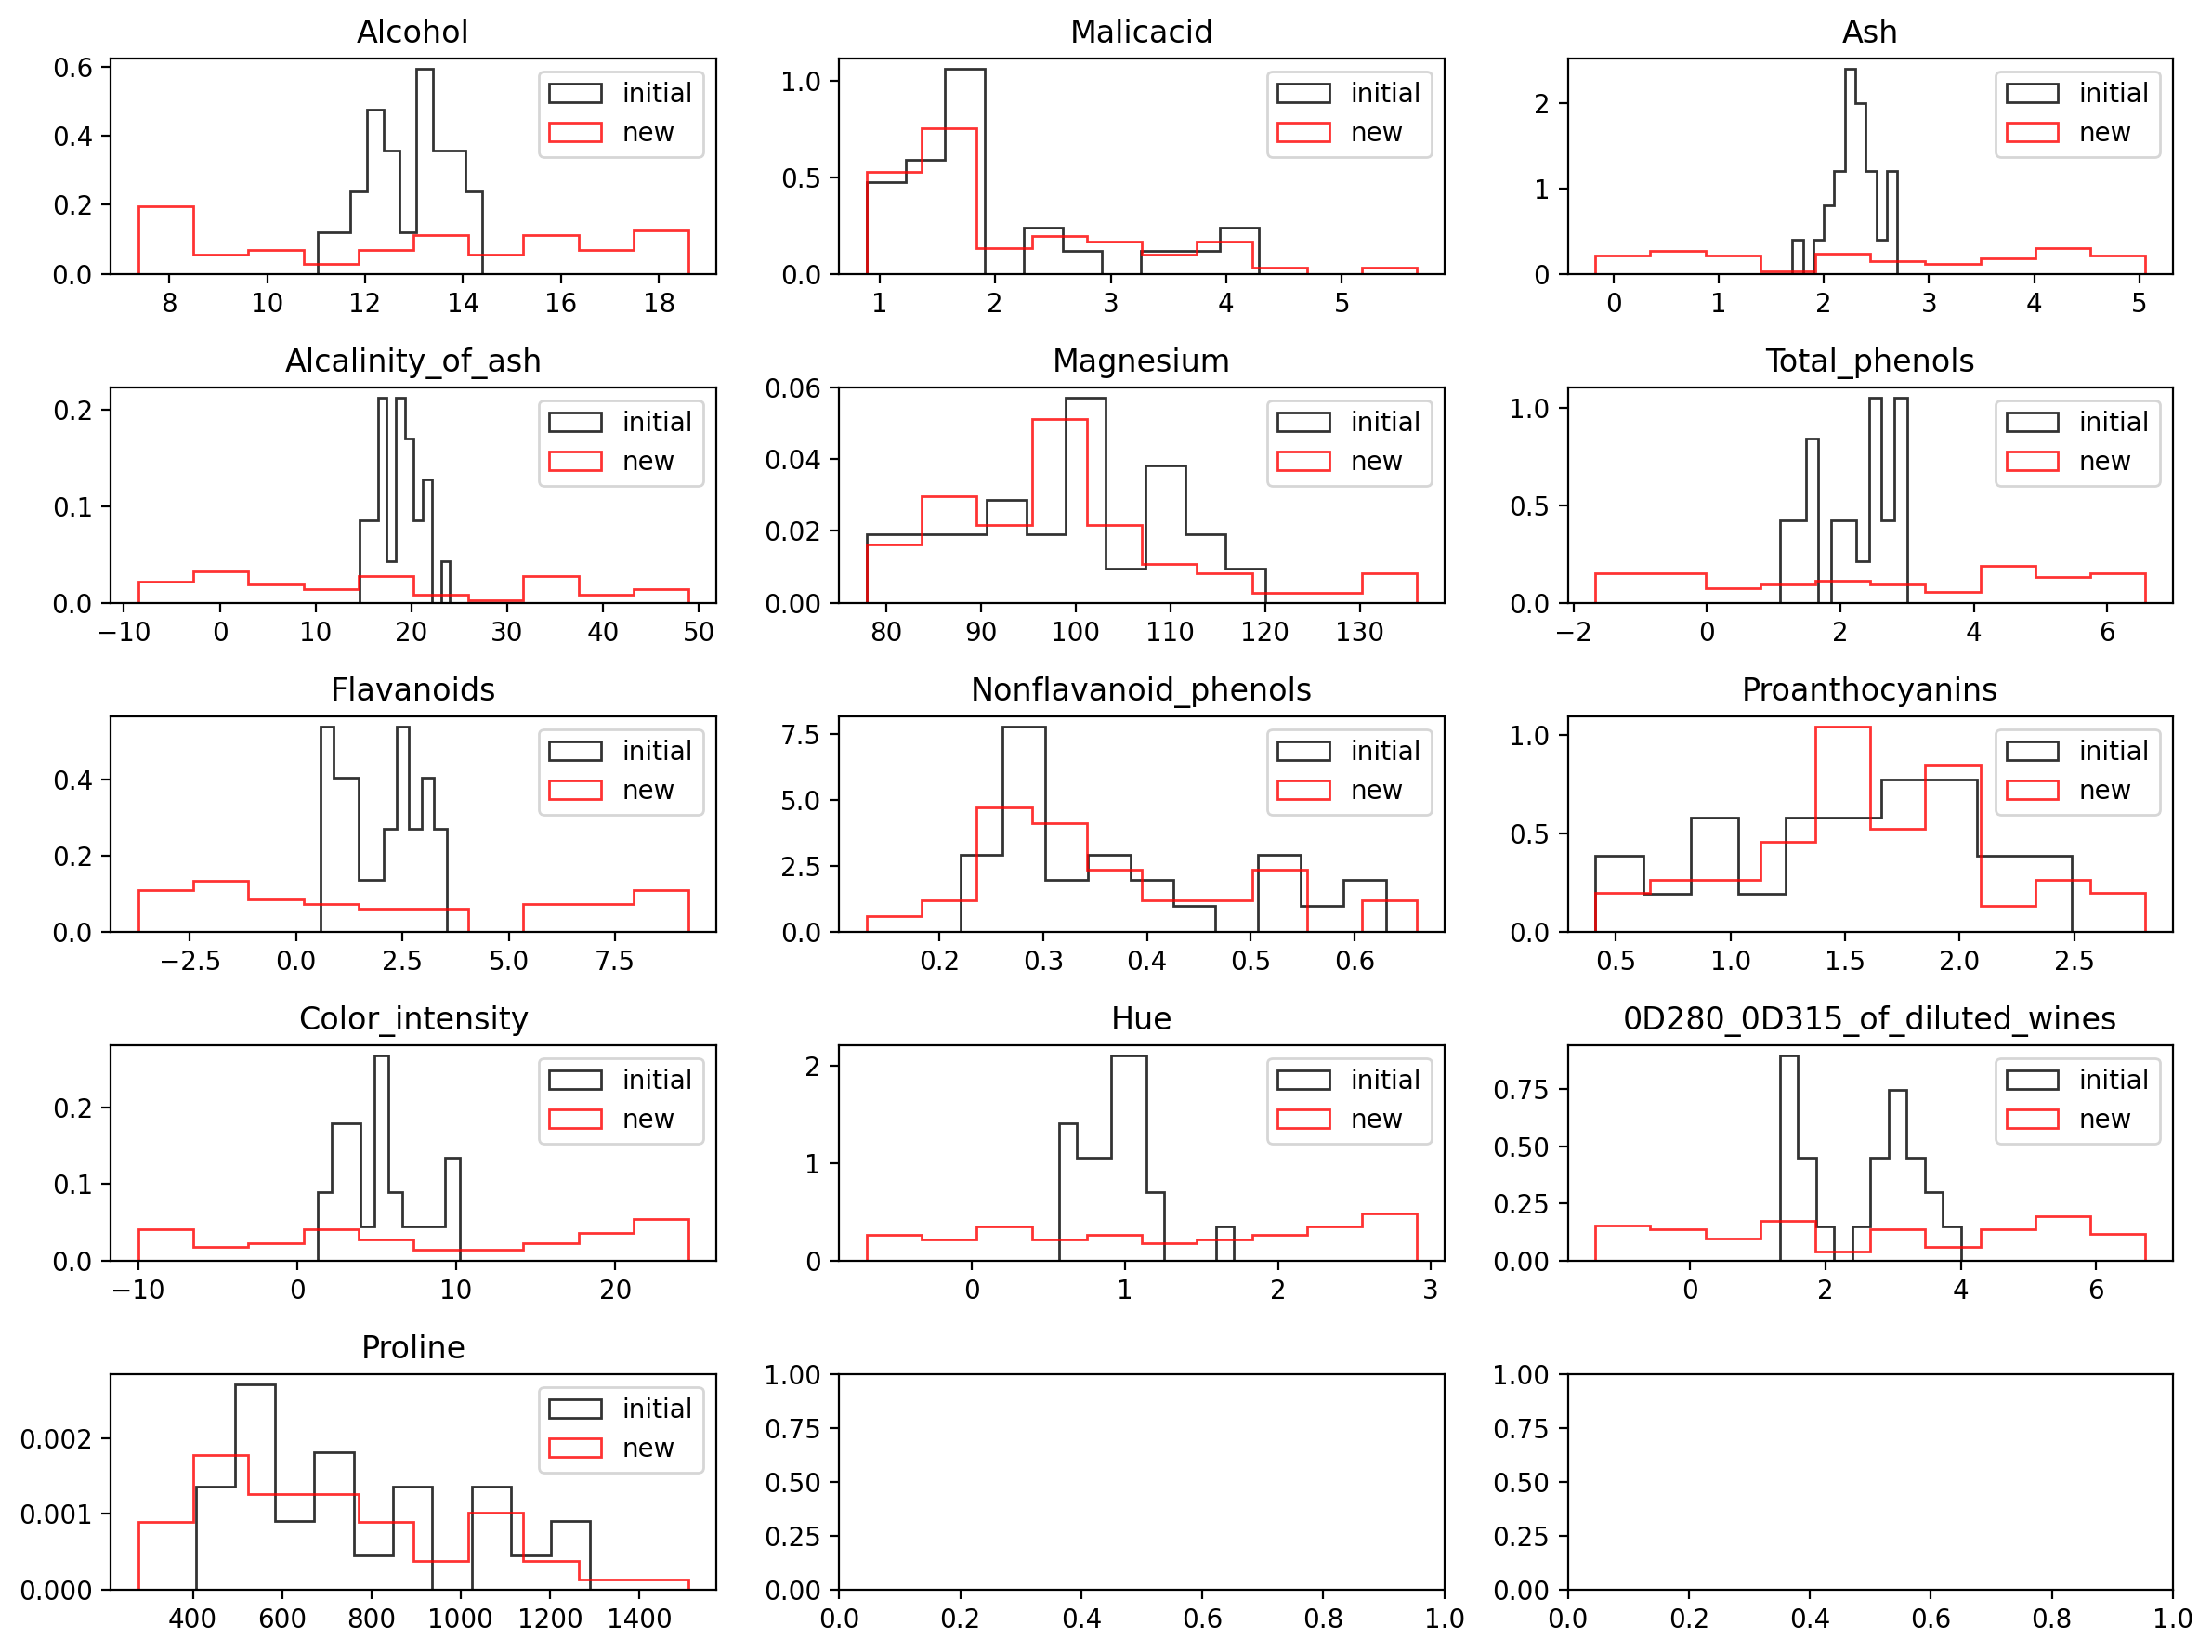

In [ ]:
nrows=5
ncols=3
ff,aw = plt.subplots(nrows,ncols,figsize=(12,9))
ii=0
for rr in range(nrows):
    for cc in range(ncols):
        ax = aw[rr][cc]
        ax.hist(Xtrain[:,ii],
                10,
                density=True,
                color='black',
                label='initial',
                histtype='step',
                alpha=0.8)
        ax.hist(Xnew[:,ii],
                10,
                density=True,
                color='red',
                label='new',
                histtype='step',
                alpha=0.8)

        ax.legend()
        ax.set_title(feature_names[ii])
        ii+=1
        if ii==len(feature_names):
            break
    if ii==len(feature_names):
            break
ff.tight_layout()

## 4.1 Use only the corrupted variables to clean the new dataset

> Ajouter une citation



Repeat the procedure of section 3 but using only the features that seem to be corrupted in the detection of the outliers (the OCSVM part). In other words, train the classifiers with all the variables, but the outlier detector only with the columns that are likely to be corrupted.

In [ ]:
 
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the range of nu values
nu_values = [0.001, 0.005, 0.01]

# Initialize variables to store results
best_nu = None
best_acc = 0
best_pipe_svc = None

# Loop through nu values
for nu in nu_values:
    # Create a pipeline with StandardScaler and OneClassSVM
    pipe_ocsvm = Pipeline([('scaler', StandardScaler()), ('ocsvm', OneClassSVM(kernel='rbf', gamma='scale', nu=nu))])

    # Fit the pipeline to the initial training data
    pipe_ocsvm.fit(Xtrain)

    # Calculate the percentage of inliers in the initial dataset
    inliers_initial = pipe_ocsvm.predict(Xtrain)
    percentage_inliers = (inliers_initial == 1).sum() / len(inliers_initial)
    print(f"Percentage of inliers in initial dataset (nu={nu}): {percentage_inliers:.4f}")

    # Predict inliers in the new dataset
    inliers_new = pipe_ocsvm.predict(Xnew)

    # Extract inliers from the new dataset
    Xnew_inliers = Xnew[inliers_new == 1]
    Ynew_inliers = Ynew[inliers_new == 1]

    # Combine inliers from new dataset with initial dataset
    X_combined = np.concatenate((Xtrain, Xnew_inliers))
    Y_combined = np.concatenate((Ytrain, Ynew_inliers))

    # Create a pipeline with StandardScaler and SVC
    pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': [1, 0.1, 0.01, 0.001]
    }

    # Create a GridSearchCV object
    grid_svc = GridSearchCV(pipe_svc, param_grid, cv=5, n_jobs=-1)

    # Fit the GridSearchCV object to the combined data
    grid_svc.fit(X_combined, Y_combined)

    # Get the best estimator and its accuracy
    best_pipe_svc_temp = grid_svc.best_estimator_
    acc = best_pipe_svc_temp.score(Xtest, Ytest)

    print(f"Accuracy on test set (nu={nu}): {acc:.4f}")
    percentage_inliers_new = (inliers_new == 1).sum() / len(inliers_new)

    print(f"number of inliers in the new dataset:{percentage_inliers_new :4f}")

    # Check if current nu has better accuracy
    if acc > best_acc:
        best_acc = acc
        best_nu = nu
        best_pipe_svc = best_pipe_svc_temp

# Train the final classifier with the best nu
print(f"Best nu: {best_nu}, Best Accuracy: {best_acc:.4f}")

# You can now use best_pipe_svc for predictions
# For example:
# predictions = best_pipe_svc.predict(X_new_data)

Percentage of inliers in initial dataset (nu=0.001): 0.5600
Accuracy on test set (nu=0.001): 0.9213
number of inliers in the new dataset:0.093750
Percentage of inliers in initial dataset (nu=0.005): 0.6800
Accuracy on test set (nu=0.005): 0.9326
number of inliers in the new dataset:0.093750
Percentage of inliers in initial dataset (nu=0.01): 0.5600
Accuracy on test set (nu=0.01): 0.9213
number of inliers in the new dataset:0.078125
Best nu: 0.005, Best Accuracy: 0.9326


# 5. Check if we can rely more in the OCSVM

In the previous sections we have relied exclusively on the observations in the initial dataset to learn the support of the data distribution.

In this section you will check if the addition of the new dataset to the characterization of the data support with the OCSVM leads to an improvement of the results.

For this purpose, repeat the procedure of section 4 (that is, only focus in the corrupted variables for the outlier detection) but with the following modifications:
- Fit the OCSVM with the dataset resulting from merging the initial and the new ones (and the variables found to be corrupted)
- Compute the value of the decision function of the SVM yielded by the element of the initial dataset closer to the boundary (notice that this value could be negative). Store this value in a variable called `inlier_threhold`
- Instead of using predict to obtain the inliers in the new dataset, use their decision function value being larger or equal than `inlier_threhold` as criterion to separate inliers from outliers. That is, we consider as inliers all the observations in the initial dataset and those observations in the new dataset whose decision function in the OCSVM exceeds the `inlier_threhold` value.

Since the dataset that you are using to fit the OCSVM has outliers, in this section you may want to explore a range with larger values for `nu`, $\nu \in \{ 0.1, 0.2, 0.3, 0.4, 0.5\}$

Train the final classifier adding the inliers and update `Results`.

# 6. Separate OCSVM for each class

The final strategy will be to learn a different data support for each class instead of a same support for all the classes.

Write code that adapts the procedure in section 5 so that the inlier detection is made separately for each class.